<a href="https://colab.research.google.com/github/caseyberger/SDSPHY/blob/main/Machine_Learning_Lesson_Plan_Iris_Classification_with_sklearn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A note on this class: 
* ML is a HUGE topic
* I only have 30 minutes so I want to get in some hands-on work with some of the widely used tools
* This means a lot of the discussions of the theory/math etc will be put aside

# Overview of Machine Learning

Traditional algorithms involve writing a set of rules for a machine to follow. Machine learning involves training a machine to learn "rules" by exposing it to data enough times that it starts to recognize patterns.

Some crucial things to keep in mind:

The data you use matters -- this is where all the work done in previous classes on cleaning, organizing, and managing data will really pay off. The phrase "garbage in garbage out" is used in ML to indicate that bad or limited data will lead to bad or limited results, and this goes for bias, too. If you train a model on biased data, you get a biased algorithm.

ML is not a catch-all -- it's useful under certain conditions (large scale, repetitive tasks, cases where the "rules" are not known) but not others (deterministic problems, far-future predictions, problems with small amounts of data). Machine learning is able to make projections, but is much better at short-term than long-term.

Always remember that machine learning helps us find examples of things that are correlated, but not necessary causal relationships! These causal relationships require more examination, reflection, and rigor to establish, although ML can help point us in high-likelihood directions.

Machine learning falls into a number of categories. The broadest classification is supervised v. unsupervised learning

## Supervised learning

In supervised learning, we already know in advance the labels we want to apply. We know there are certain "classes" we wish to identify, and we have information about those classes in advance. 

The goal is to propose a model function that maps inputs (data of some sort) to outputs (labels or predictive values).
For example, if we wanted to train an algorithm to identify dogs, we would use images as our data and our outcome would be binary: dog or not-dog. This is an example of "classification" -- it has a set of discrete outcomes (labels, classes, categories).

If we wanted to predict the price a house might sell for, we would use previous home sales data as the input, and the output would be a sale price. This is an example of "regression" -- it has continuous outcomes (a numerical price value).

Classification:
* categorizes data (e.g. images) into a set of limited groupings or labels
* at least two labeled classes must exist
    - two classes only: binary classification
    - more than two classes: multi-class classification
* can assign multiple classes to the same item: multi-label classification
* goal: predict a label


Regression
* determines a relationship between input variables and output quantity
* can take multiple input variables: "multivariate regression"
* goal: predict a number


## Unsupervised learning
A brief note on unsupervised learning: if we didn't have prior knowledge of our labels, we could still train a machine to find patterns and group things. But we would need a different set of ML algorithms, which fall under the category of "unsupervised learning." These include dimensionality reduction and other clustering algorithms that are intended to be used on unlabeled data, like k-means clustering, hierarchical clustering, etc.

## Implementing a Classification Algorithm

The process:

1. Data preparation
2. Model selection
3. Training
4. Testing/Evaluation
5. Forecasting/predictions

# Sci-kit
There are tons of machine learning resources online: PyTorch, TensorFlow, Keras, etc. We will be using sci-kit today: https://scikit-learn.org/stable/

In a semester-long course, we'd spend more time on seeking out datasets, cleaning and preparing them, but for the sake of time today, we'll use some pre-loaded datasets that come with sci-kit.

Let's import the tools we will be using:
* pandas
* numpy
* matplotlib
* seaborn
* sci-kit learn (import sklearn)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Data preparation

Let's go ahead and import a dataset and see what it looks like.

We'll use the iris dataset. To do this, we first need to import the datasets library from the sklearn package:

from sklearn import datasets

In [ ]:
from sklearn import datasets

A dataset is an object that acts like a dictionary. It has keys that are specific to machine learning algorithms. 

Assign the iris dataset to a variable, so we can explore it:

iris_data = datasets.load_iris()

In [ ]:
iris_data = datasets.load_iris()

Take a minute to explore this data. 
* Use the .keys() function like you've done with dictionaries to see what's inside. 
* print the value associated with the key 'DESCR'. What is this dataset?
* What is the shape of the data? 
* What is the difference between the target and the target name? 
* What are the target names and feature names?

In [ ]:
#CUT - for students to do
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
#CUT - for students to do
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#CUT - for students to do
np.shape(iris_data['data'])

(150, 4)

In [ ]:
#CUT - for students to do
len(iris_data['target'])

150

In [ ]:
#CUT - for students to do
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [ ]:
#CUT - for students to do
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Let's make a pandas dataframe to make exploration easier.

In [ ]:
def make_df(data, feature_names, targets):
  df = pd.DataFrame(data,columns = feature_names)
  df["target"] = targets
  df["target_name"] = df["target"].map({0: 'setosa', 1:'versicolor', 2: 'virginica'})
  return df

In [ ]:
df = make_df(iris_data['data'], iris_data["feature_names"], iris_data["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Now let's make some exploratory plots

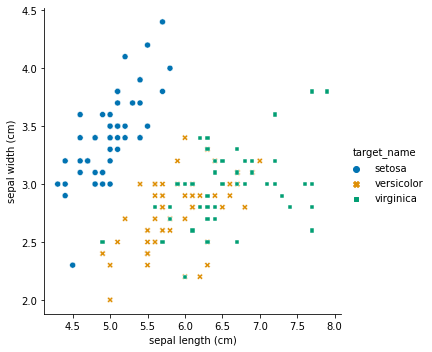

In [ ]:
sns.relplot(data = df, x = "sepal length (cm)", y = "sepal width (cm)", 
            hue = "target_name", style = "target_name", palette="colorblind")

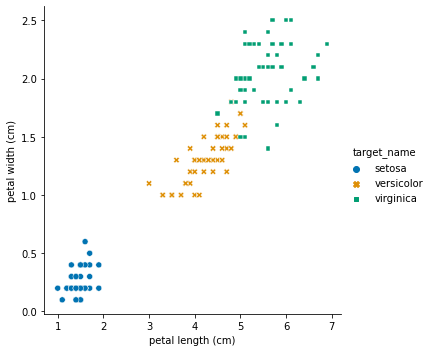

In [ ]:
sns.relplot(data = df, x = "petal length (cm)", y = "petal width (cm)", 
            hue = "target_name", style = "target_name", palette="colorblind")

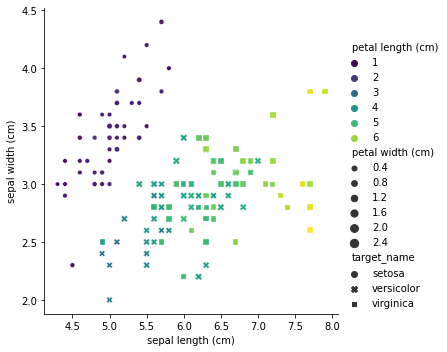

In [ ]:
sns.relplot(data = df, x = "sepal length (cm)", y = "sepal width (cm)", 
            hue = "petal length (cm)", size = "petal width (cm)",
            style = "target_name", palette="viridis")

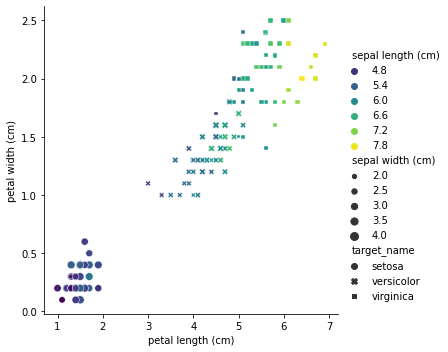

In [ ]:
sns.relplot(data = df, x = "petal length (cm)", y = "petal width (cm)", 
            hue = "sepal length (cm)", size = "sepal width (cm)",
            style = "target_name", palette="viridis")

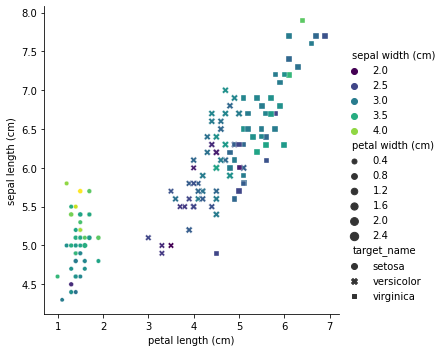

In [ ]:
sns.relplot(data = df, x = "petal length (cm)", y = "sepal length (cm)", 
            hue = "sepal width (cm)", size = "petal width (cm)",
            style = "target_name", palette="viridis")

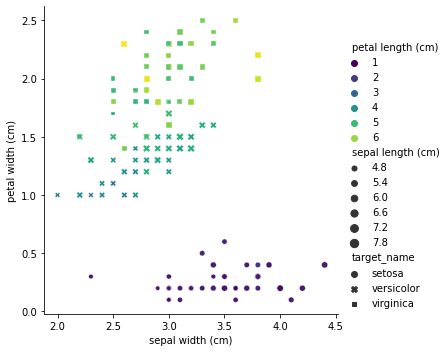

In [ ]:
sns.relplot(data = df, x = "sepal width (cm)", y = "petal width (cm)", 
            hue = "petal length (cm)", size = "sepal length (cm)",
            style = "target_name", palette="viridis")

### Reducing our problem size

For the sake of this class (for easier visualization), we're going to restrict our features to just 2: petal length and petal width. So let's read in the data again and take just those two features.

In [ ]:
features_2D=["petal width (cm)","petal length (cm)"]
data_2D = df[features_2D].to_numpy()
targets = df["target"].to_numpy()
print(np.shape(data_2D))
print(np.shape(targets))

(150, 2)
(150,)


# Model selection

https://en.wikipedia.org/wiki/Support_vector_machine

We're going to use the support vector machine (SVM). 

SVM constructs a hyperplane in multidimensional space to separate different classes. 

A hyperplane is just a plane with one dimension fewer than the space of the problem. So if you had 2 classes, it would be a 2D space, and the hyperplane would just be a line that divides the two classes.

https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b



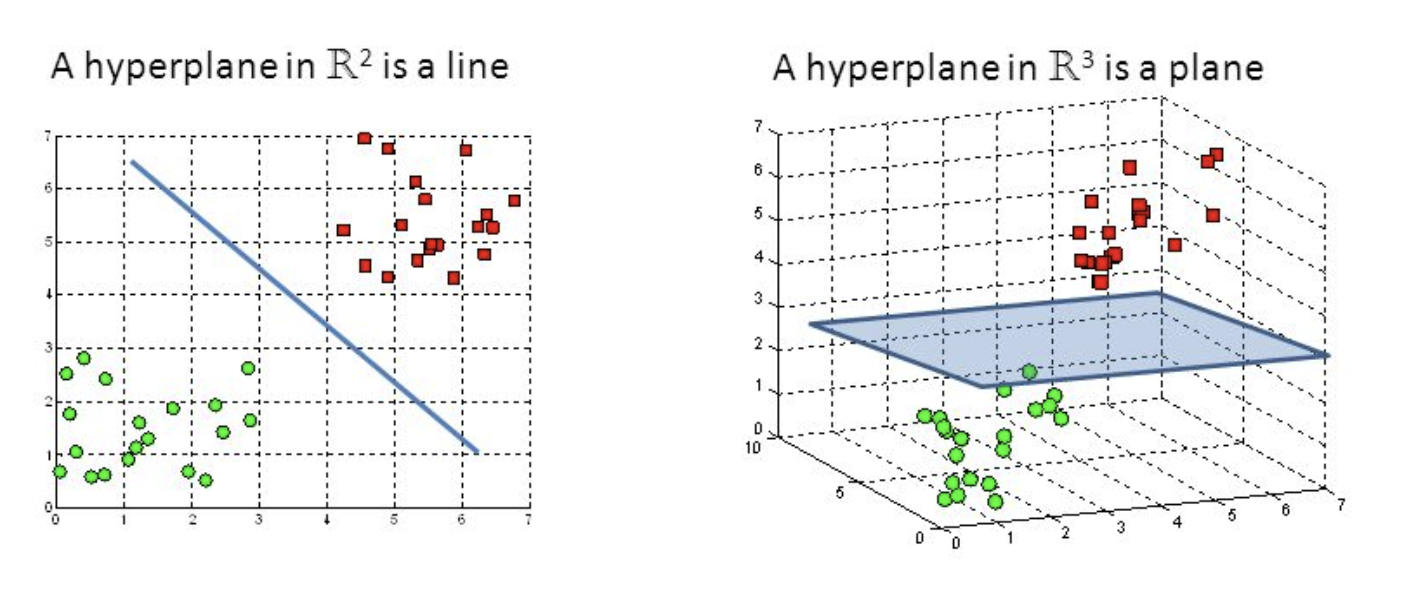

We don't have to use a linear kernel. There might be some places where the data is clearly nonlinear. In that case, we can use other kernels that would accommodate the shape we need.

(Others = rbf or radial basis function, polynomial with different degrees, and sigmoid)

SVM generates the optimal hyperplane in an iterative manner, using the support vectors (data points) closest to the hyperplane to adjust in order to have the widest margin possible.

Let's import the svm module from sklearn so we can use it

In [ ]:
from sklearn import svm

Within svm, there is a function called SVC or "Support Vector Classification." This is the set of tools that perform a supervised classification.

LEARN MORE ABOUT WHAT SVC ACTUALLY DOES:

Some important concepts in SVM are as follows −

* Support Vectors − They may be defined as the datapoints which are closest to the hyperplane. Support vectors help in deciding the separating line.

* Hyperplane − The decision plane or space that divides set of objects having different classes.

* Margin − The gap between two lines on the closet data points of different classes is called margin.


Now we can initialize the model. We're going to use a linear kernel.

https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589


In [ ]:
iris_model = svm.SVC(kernel = "linear")

# Training

We always want to split the data into two groups: training data and testing data. We don't ever want to test our model on the same data we trained it on. That's not a good test of whether the model works.

So let's split our data into two groups: 20% will go into our testing group, and the rest into our training group. 

It's really important that we randomize the data. We could do this all ourselves, by hand, but sklearn has a built-in function we can use instead.

We need to import it:

from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

Now let's split the data:

In [ ]:
data_tr, data_te, label_tr, label_te = train_test_split(data_2D, targets, test_size=0.3)

And then we train the model. We call the same model we initiatlized, but now we tell it to fit the data according to the parameters we gave it:

In [ ]:
iris_model.fit(data_tr,label_tr)

SVC(kernel='linear')

# Testing/Evaluation

Now we see how well our model performed after being trained on our data. We will use the predict() function to have our model generate its predictions for the testing input (X_test). Then we will check the labels generated by the mode against the labels for that data (y_test)

In [ ]:
label_predict = iris_model.predict(data_te)

### Activity:
Print out the results as well as the known labels for the data. How good was our model?

In [ ]:
print(label_predict)
print(label_te)

[2 0 0 2 2 1 1 0 2 2 2 1 0 1 0 0 0 2 2 2 0 2 1 0 1 2 1 1 0 1 0 0 0 1 2 0 2
 1 0 2 2 1 1 1 0]
[2 0 0 2 2 1 1 0 2 2 2 1 0 1 0 0 0 2 2 2 0 2 1 0 1 2 1 1 0 1 0 0 0 1 2 0 2
 1 0 2 2 2 1 1 0]


We can calculate exactly how good it was by checking the percentage it got right in our testing batch.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(label_te, label_predict)

0.9777777777777777

Let's make a dataframe and use seaborn to plot the results:

In [ ]:
prediction_df = make_df(data_te, features_2D, label_predict) 

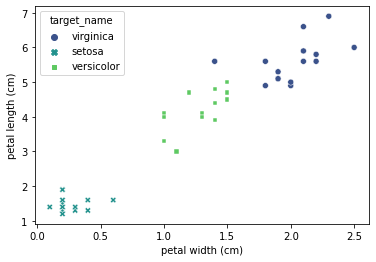

In [ ]:
sns.scatterplot(data = prediction_df, x = "petal width (cm)", y = "petal length (cm)", 
            hue = "target_name", style = "target_name", palette="viridis")

## Plotting the model

We can see the groups the model has determined if we plot the model itself. Below, I've defined a function that does just that:

In [ ]:
def plot_model(model):
  pw_grid = np.linspace(df["petal width (cm)"].min(),df["petal width (cm)"].max(),100)
  pl_grid = np.linspace(df["petal length (cm)"].min(),df["petal length (cm)"].max(),100)
  pw,pl = np.meshgrid(pw_grid, pl_grid)
  xx = np.column_stack([pw.ravel(),pl.ravel()])
  yy = model.predict(xx) 
  Z = yy.reshape(pw.shape)
  my_cmap = plt.cm.get_cmap('crest', 3)
  plt.contourf(pw, pl, Z, cmap = my_cmap, alpha=0.25)
  plt.scatter(x = df["petal width (cm)"], y = df["petal length (cm)"], 
              c = df["target"], cmap = my_cmap)
  plt.xlabel("Petal width")
  plt.ylabel("Petal length")
  cbar=plt.colorbar(ticks=[0.3, 1, 1.7])
  cbar.ax.set_yticklabels(['Setosa', 'Versicolor', 'Virginica'])
  plt.show()

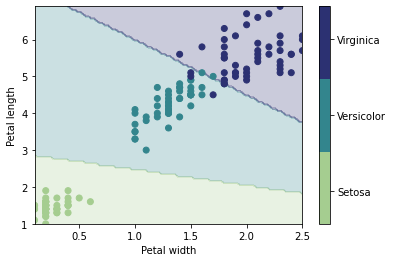

In [ ]:
plot_model(iris_model)

## Tuning the model

We can see how changing different parameters (the kernel, the regularization (C), and gamma) will affect our results.



Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line. Default for gamma is "scale" which is 1/(n_features * variance(X))

### Activity: 
In pairs, define a function that does the following:
1. takes as input the kernel, C, and gamma
2. initializes the model
3. trains the model on the data (use the data we already split into training and testing)
4. tests the model and prints the accuracy
5. plots the model 

(hint: you can copy-paste almost everything from stuff you've already written above)

In [ ]:
def plot_classification(kernel, C, gamma):
  model = svm.SVC(kernel = kernel, C = C, gamma = gamma)
  model.fit(data_tr,label_tr)
  label_predict = model.predict(data_te)
  accuracy = accuracy_score(label_te, label_predict)
  print("accuracy = {}".format(accuracy))
  plot_model(model)

accuracy = 0.9777777777777777


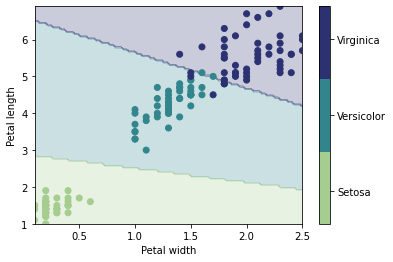

In [ ]:
plot_classification(kernel = "linear", C = 0.5, gamma = "scale")

accuracy = 0.9555555555555556


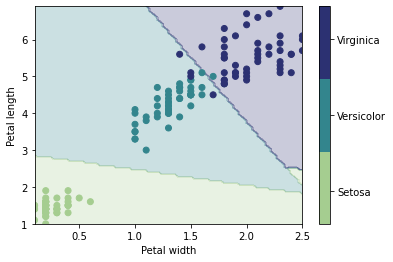

In [ ]:
plot_classification(kernel = "linear", C = 10.0, gamma = "scale")

accuracy = 0.9555555555555556


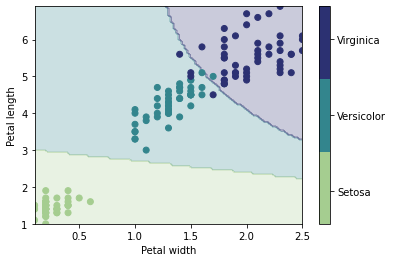

In [ ]:
plot_classification(kernel = "poly", C = 1.0, gamma = "scale")

accuracy = 0.9555555555555556


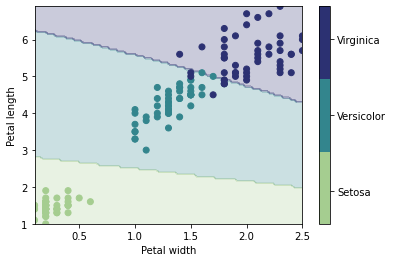

In [ ]:
plot_classification(kernel = "rbf", C = 1.0, gamma = "scale")

accuracy = 0.9777777777777777


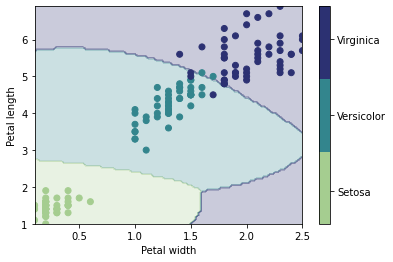

In [ ]:
plot_classification(kernel = "rbf", C = 1.0, gamma = 1)

accuracy = 0.9777777777777777


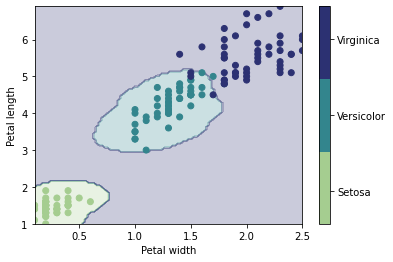

In [ ]:
plot_classification(kernel = "rbf", C = 1.0, gamma = 10)

accuracy = 0.8


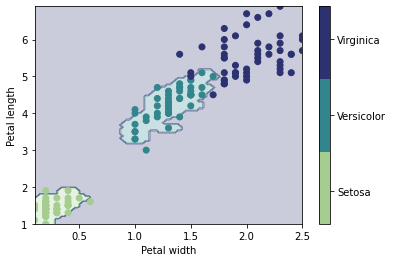

In [ ]:
plot_classification(kernel = "rbf", C = 1.0, gamma = 100)

# Forecasting/predictions

We could now use this model to categorize irises, based on their petal widths and lengths. With ~96% accuracy, we could place the iris in one of the three categories: setosa, versicolor, veridis

# Challenge Activity
Try the classification again, but now including all four features (sepal length and width AND petal length and width). How do your results change? How does tuning the model change the results? Visualizing the data can be more difficult in 4 dimensions, so try a few different ways.